In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regional-sales-analysis/Regional Sales Dataset.xlsx


In [2]:
df=pd.read_excel("/kaggle/input/regional-sales-analysis/Regional Sales Dataset.xlsx",sheet_name=None)

In [3]:
df_sales=df["Sales Orders"]
df_customers=df["Customers"]
df_products=df["Products"]
df_regions=df["Regions"]
df_state_reg=df["State Regions"]
df_budgets=df["2017 Budgets"]

In [4]:
df_sales.shape

(64104, 12)

In [5]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [6]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [7]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [8]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [9]:
df_state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [10]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [11]:
new_header=df_state_reg.iloc[0]
df_state_reg.columns=new_header
df_state_reg=df_state_reg[1:].reset_index(drop=True)

df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [12]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [13]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [14]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [15]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [16]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [17]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

####  **data cleaning and wrangling**

In [18]:
# merge with customers

df1=df_sales.merge(
    df_customers,
    how="left",
    left_on="Customer Name Index",
    right_on="Customer Index")

In [19]:
df1.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [20]:
#merge with products

df1=df1.merge(
    df_products,
    how="left",
    left_on="Product Description Index",
    right_on="Index")

In [21]:
df1.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [22]:
#merge with regions

df1=df1.merge(
    df_regions,
    how="left",
    left_on="Delivery Region Index",
    right_on="id")

In [23]:
df1.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [24]:
#merge with State Region

df1=df1.merge(
    df_state_reg[["State Code","Region"]],
    how="left",
    left_on="state_code",
    right_on="State Code")

In [25]:
df1.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [26]:
#merge with budgets

df1=df1.merge(
    df_budgets,
    how="left",
    on="Product Name")

In [27]:
#clean up redundant columns

cols_to_drop=["Customer Index","Index","id","State Code"]
df1=df1.drop(columns=cols_to_drop,errors="ignore")

df1.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [28]:
# convert all columns to lower case

df1.columns=df1.columns.str.lower()
df1.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'region', '2017 budgets'],
      dtype='object')

In [29]:
#keep the important columns and delete the columns that we don't need

cols_to_keep=['ordernumber', 'orderdate','customer names', 'channel', 'order quantity', 'unit price',
       'line total', 'total unit cost','product name','county', 'state_code','region' ,'state', 'latitude',
       'longitude','2017 budgets']

In [30]:
df1=df1[cols_to_keep]
df1

,ordernumber,orderdate,customer names,channel,order quantity,unit price,line total,total unit cost,product name,county,state_code,region,state,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,6,2499.1,14994.6,1824.343,Product 27,Chatham County,GA,South,Georgia,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,11,2351.7,25868.7,1269.918,Product 20,Johnson County,IN,Midwest,Indiana,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,6,978.2,5869.2,684.740,Product 26,Alameda County,CA,West,California,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,7,2338.3,16368.1,1028.852,Product 7,Monroe County,IN,Midwest,Indiana,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,8,2291.4,18331.2,1260.270,Product 8,Hartford County,CT,Northeast,Connecticut,41.77524,-72.52443,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,12,1815.7,21788.4,980.478,Product 26,Bucks County,PA,Northeast,Pennsylvania,40.15511,-74.82877,5685138.270
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,6,864.3,5185.8,579.081,Product 21,Cook County,IL,Midwest,Illinois,42.11030,-88.03424,959899.218
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,11,3953.0,43483.0,2648.510,Product 13,Broward County,FL,South,Florida,26.24453,-80.20644,3720639.645
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,7,3959.7,27717.9,2930.178,Product 20,Erie County,NY,Northeast,New York,42.91002,-78.74182,2067108.120


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ordernumber      64104 non-null  object        
 1   orderdate        64104 non-null  datetime64[ns]
 2   customer names   64104 non-null  object        
 3   channel          64104 non-null  object        
 4   order quantity   64104 non-null  int64         
 5   unit price       64104 non-null  float64       
 6   line total       64104 non-null  float64       
 7   total unit cost  64104 non-null  float64       
 8   product name     64104 non-null  object        
 9   county           64104 non-null  object        
 10  state_code       64104 non-null  object        
 11  region           64104 non-null  object        
 12  state            64104 non-null  object        
 13  latitude         64104 non-null  float64       
 14  longitude        64104 non-null  float

In [32]:
df1.describe()

,orderdate,order quantity,unit price,line total,total unit cost,latitude,longitude,2017 budgets
count,64104,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,6.410400e+04
mean,2016-01-29 01:28:20.935979008,8.441689,2284.380803,19280.682937,1432.083899,37.769427,-94.247116,2.998558e+06
min,2014-01-01 00:00:00,5.000000,167.500000,837.500000,68.675000,25.468720,-123.262040,5.944716e+05
25%,2015-01-13 00:00:00,6.000000,1031.800000,8019.900000,606.216000,33.953330,-112.034140,1.672229e+06
50%,2016-01-27 00:00:00,8.000000,1855.900000,14023.100000,1084.495500,39.114170,-88.200900,3.016489e+06
75%,2017-02-13 00:00:00,10.000000,3606.275000,27416.400000,2046.933750,41.676550,-80.407000,3.925425e+06
max,2018-02-28 00:00:00,12.000000,6566.000000,78711.600000,5498.556000,48.759550,-70.255330,5.685138e+06
std,NaN,2.276217,1663.598141,15429.602766,1107.705728,5.068599,16.884334,1.558775e+06


#### Feature Engineering

In [33]:
df1["total_cost"]=df1["order quantity"]*df1["total unit cost"]

In [34]:
df1["profit"]=df1["line total"]-df1["total_cost"]

df1["profit_margin_pct"]=df1["profit"]/df1["line total"]*100

In [35]:
df1.head()

,ordernumber,orderdate,customer names,channel,order quantity,unit price,line total,total unit cost,product name,county,state_code,region,state,latitude,longitude,2017 budgets,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,6,2499.1,14994.6,1824.343,Product 27,Chatham County,GA,South,Georgia,32.08354,-81.09983,964940.231,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,11,2351.7,25868.7,1269.918,Product 20,Johnson County,IN,Midwest,Indiana,39.61366,-86.10665,2067108.120,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,6,978.2,5869.2,684.740,Product 26,Alameda County,CA,West,California,37.66243,-121.87468,5685138.270,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,7,2338.3,16368.1,1028.852,Product 7,Monroe County,IN,Midwest,Indiana,39.16533,-86.52639,889737.555,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,8,2291.4,18331.2,1260.270,Product 8,Hartford County,CT,Northeast,Connecticut,41.77524,-72.52443,1085037.329,10082.160,8249.040,45.0


In [36]:
df1.groupby('region')['profit'].sum()

region
Midwest      1.200967e+08
Northeast    7.723753e+07
South        1.251712e+08
West         1.392671e+08
Name: profit, dtype: float64

In [37]:
df1.groupby('channel')['line total'].sum()

channel
Distributor    387139788.6
Export         180631866.0
Wholesale      668197244.4
Name: line total, dtype: float64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

<Figure size 800x500 with 0 Axes>

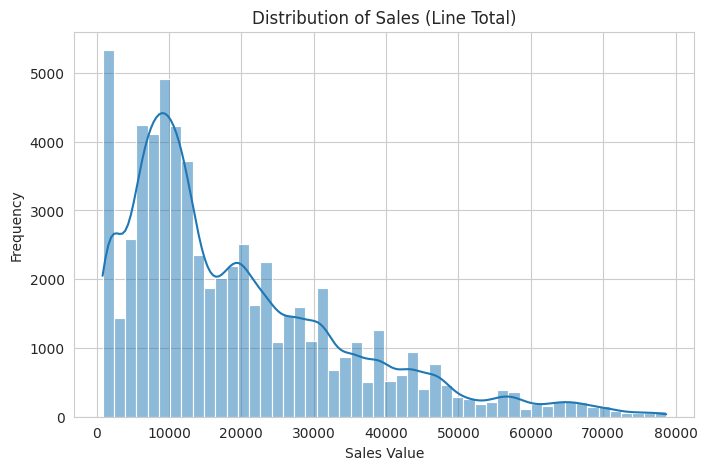

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df1['line total'], bins=50, kde=True)
plt.title("Distribution of Sales (Line Total)")
plt.xlabel("Sales Value")
plt.ylabel("Frequency")
plt.show()


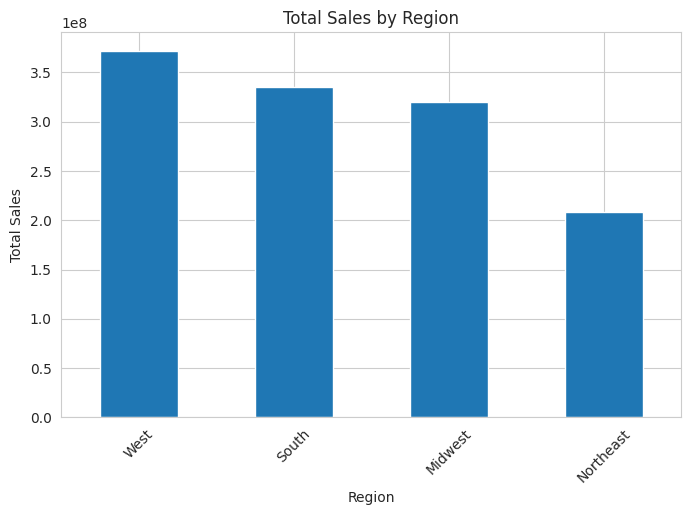

In [40]:
region_sales = df1.groupby('region')['line total'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


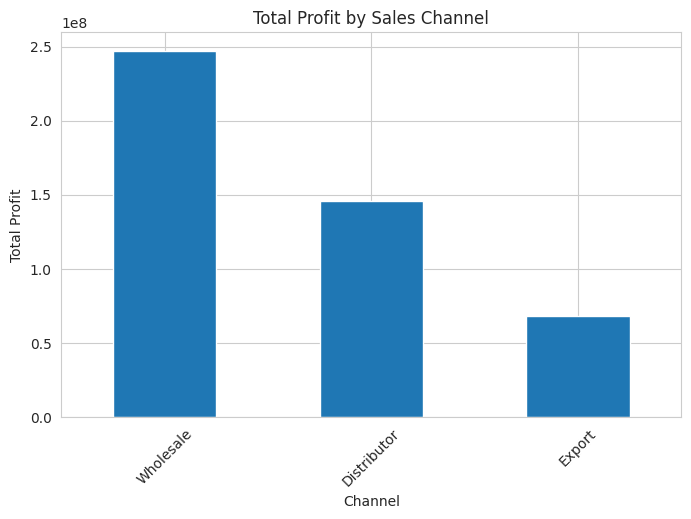

In [41]:
channel_profit = df1.groupby('channel')['profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
channel_profit.plot(kind='bar')
plt.title("Total Profit by Sales Channel")
plt.xlabel("Channel")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()


In [42]:
df1.to_csv("final_regional_sales_analysis.csv",index=False)